<h1 style="text-align: center;">Reading WAV Files With Python</h1>

---

## Set Up

We will be using the `scipy` library in order to read our WAV files.
We will be using `matplotlib` along with `numpy` to manipulate and plot the data from the WAV file (specifically, `sample.wav` in `audio_files/`).

In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import time

## Accessing the data

We will use `scipy`'s `read()` function to read in the sample rate and the data of our WAV file.  
The data of our WAV file is in the form of an array of numbers that represent the bit depth of the sound at the moment the sample was taken. The data can be a multi-dementional array if the WAV file contains recordings of multiple audio channels. And depending on the method of extracting that data and the data's format, the data can be in different bit formats (e.g., integer, floating point type).

In [2]:
file = 'audio_files/sample.wav'
(samplerate, data) = wavfile.read(file)

We can check how many chanels of sound are present simply by looking at the shape of the WAV file's data:

In [3]:
print(f"Number of channels = {data.shape[1]}")

Number of channels = 2


We can compute the length of the WAV file by dividing the number of samples in the data by the samplerate:

In [4]:
length = data.shape[0] / samplerate
print(f"Length = {length}s")

Length = 10.0s


Returns the data, timestamp (nanoseconds), and samplerate of a singular audio file:

In [5]:
timestamp = Path(file).stat().st_mtime_ns
print(f'samplerate: {samplerate} \n timestamp: {timestamp} \ndata: {data}')

samplerate: 44100 
 timestamp: 1630959711160926150 
data: [[  80   80]
 [  72   72]
 [  56   56]
 ...
 [3712 3712]
 [3288 3288]
 [1564 1564]]


## Graphing the data

Next we will plot the WAV file's data in order to be able to see the soundwave.  
We will first create an array that will act as our independent variable which is time. We can do this using the `numpy` function `linspace()` or `arange()`

#### Method 1 using `linspace()`
The first parameter is the starting number, the second is the end number, and the third number is the number of steps in between. We can calculate the number of steps required by getting the length of the data (this will be the 1st dimensional length)

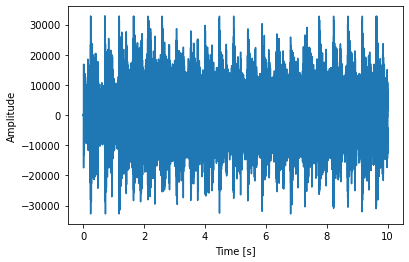

In [6]:
time = np.linspace(0, length, len(data))
plt.plot(time, data[:, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#### Method 2 using `arange()`

In [7]:
time2 = np.arange(0, len(data)/samplerate, 1/samplerate)

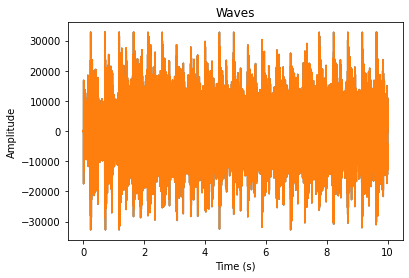

In [8]:
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waves')
plt.plot(time2, data)
plt.show()

<h1 style="text-align: center;">Recording WAV Files With Python</h1>

---

## Setup

In [9]:
import sounddevice as sd
from scipy.io.wavfile import write

Next we must declare the the sampling frequency of the audio along with the recording duration. We will set the sampling frequency to be 44100 and duration 5 seconds

In [10]:
freq = 44100

duration = 5

## Record

We will then record our audio using the `rec()` function from the `sounddevice` library which will save the audio as a Numpy array. We will provide the `rec()` function with the number of samples we want, the sample rate, and the number of audio channels. The number of samples is calculated by multiplying the duration by the frequency. The microphone we use records two channel audio, so we set the channels to 2.   
We will use the `wait()` function to record the audio for the given number of seconds.

In [11]:
recording = sd.rec(int(duration * freq), samplerate=freq, channels=2)

sd.wait()

## Save Recording

Finaly we will use the `write()` function to convert the Numpy array to an audio file. We must provide the `write()` function with a filename for our audio file, the sampling frequency of the file, and the actual data for the file

In [12]:
# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("audio_files/recording.wav", freq, recording)

You should now see a new file named "recording.wav" in the `audio_files` directory!